In [1]:
from datetime import datetime
import openreview
import os
import tqdm
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

# A client is required for any OpenReview API actions
guest_client = openreview.Client(baseurl='https://api.openreview.net')

In [2]:
START_OF_2022 = 1640995200000

def plot_submission_times(guest_client, year):
    invitation = f'ICLR.cc/{year}/Conference/-/Blind_Submission'
    tmdates = []
    for i, forum_note in tqdm.tqdm(enumerate(openreview.tools.iterget_notes(
            guest_client, invitation=invitation))):
        for revision in guest_client.get_references(
                referent=forum_note.id, original=True):
          if revision.tmdate > START_OF_2022:
            continue
          else:
            tmdates.append(revision.tmdate)
    
    sorted_tmdates = sorted(tmdates)
    tmdate_differences = []
    for tmdate, next_tmdate in zip(sorted_tmdates[:-1], sorted_tmdates[1:]):
      diff = next_tmdate - tmdate
      tmdate_differences.append((diff, tmdate))
      
    sorted_differences = sorted(tmdate_differences, reverse=True)[:10]
    sorted_differences_dicts = []
    for difference, start_time in sorted_differences:
      sorted_differences_dicts.append(
        {"diff in seconds": difference,
         "gap start timestamp": start_time,
         "gap end timestamp": start_time + difference,
         "gap start date": datetime.fromtimestamp(start_time/1000).strftime("%Y-%m-%d")})
    
    sns.histplot(tmdates, bins=50)
    
    display(HTML(pd.DataFrame.from_dict(sorted_differences_dicts).to_html()))


911it [03:19,  4.58it/s]


,diff in seconds,gap start timestamp,gap end timestamp,gap start date
0,70558492885,1546570475487,1617128968372,2019-01-03
1,4385080136,1540802466059,1545187546195,2018-10-29
2,3017994777,1537784471282,1540802466059,2018-09-24
3,2336937093,1509629473059,1511966410152,2017-11-02
4,2086390477,1535698080805,1537784471282,2018-08-31
5,1861823930,1532340029643,1534201853573,2018-07-23
6,1382929292,1545187546195,1546570475487,2018-12-18
7,1206225375,1529315426322,1530521651697,2018-06-18
8,1111157269,1525715217217,1526826374486,2018-05-07
9,1095795411,1530855361726,1531951157137,2018-07-06


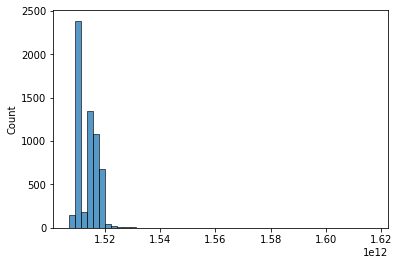

In [3]:
plot_submission_times(guest_client, "2018")

1419it [05:20,  4.43it/s]


,diff in seconds,gap start timestamp,gap end timestamp,gap start date
0,2499207031,1572553935011,1575053142042,2019-10-31
1,2003124153,1569425369978,1571428494131,2019-09-25
2,1801711718,1567618912215,1569420623933,2019-09-04
3,1760617436,1575053142042,1576813759478,2019-11-29
4,1735752010,1565206845351,1566942597361,2019-08-07
5,1523176255,1576813759478,1578336935733,2019-12-19
6,1516039521,1543840239376,1545356278897,2018-12-03
7,1228670072,1563978175279,1565206845351,2019-07-24
8,1134086818,1540327354118,1541461440936,2018-10-23
9,1125331096,1571428603915,1572553935011,2019-10-18


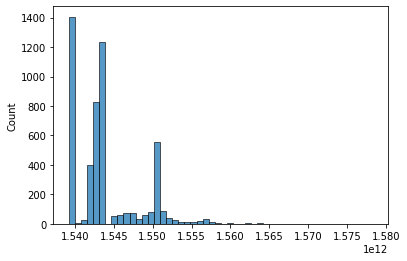

In [4]:
plot_submission_times(guest_client, "2019")

2213it [08:05,  4.56it/s]


,diff in seconds,gap start timestamp,gap end timestamp,gap start date
0,7647224617,1618906987417,1626554212034,2021-04-20
1,5277351853,1608862909594,1614140261447,2020-12-24
2,2611970308,1606250939286,1608862909594,2020-11-24
3,2160159780,1614141755058,1616301914838,2021-02-23
4,2051089317,1629884052202,1631935141519,2021-08-25
5,2028679561,1627855287530,1629883967091,2021-08-01
6,1774482417,1595003893701,1596778376118,2020-07-17
7,1731989285,1575078733458,1576810722743,2019-11-29
8,1546894238,1569620257810,1571167152048,2019-09-27
9,1544668668,1571428972960,1572973641628,2019-10-18


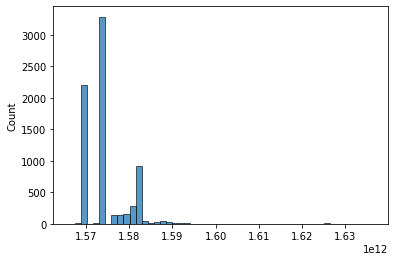

In [5]:
plot_submission_times(guest_client, "2020")

2595it [09:27,  4.57it/s]


,diff in seconds,gap start timestamp,gap end timestamp,gap start date
0,3957129270,1635170324643,1639127453913,2021-10-25
1,2406163965,1625510296116,1627916460081,2021-07-05
2,2312923167,1608232628370,1610545551537,2020-12-17
3,2145332021,1633024992622,1635170324643,2021-09-30
4,1911782742,1603113737752,1605025520494,2020-10-19
5,945575376,1629046840363,1629992415739,2021-08-15
6,914283737,1629992415739,1630906699476,2021-08-26
7,873790555,1628173049808,1629046840363,2021-08-05
8,746406853,1606343272656,1607089679509,2020-11-25
9,706215864,1624508916512,1625215132376,2021-06-24


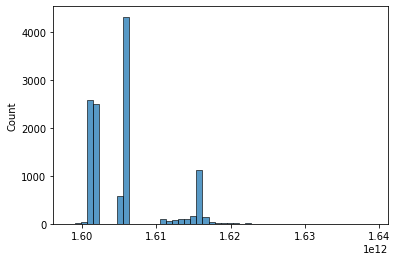

In [6]:
plot_submission_times(guest_client, "2021")

In [ ]:
plot_submission_times(guest_client, "2022")

2494it [09:05,  4.60it/s]